# 1.线性回归
**回归**是能为一个或多个自变量与因变量之间的关系建模的一类方法，回归经常用来表示输入和输出之间的关系。</br>
在机器学习领域中的大多数任务通常都与**预测**有关。当我们想预测一个数值时，就会涉及回归问题。
## 1.1 线性回归的基本元素
线性回归基于几个简答的假设：首先，假设自变量x和因变量y之间的关系是呈**线性的**，即y可以表示为x中元素的加权和，这里通常孕育包含观测值的一些噪声；其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。</br>
这里我们以预测未来房屋价格为例。首先，我们需要收集一个真实的数据集。这个数据集包括房屋价格、面积和房龄。专业术语称之为**训练集**。每行数据称为数据样本，也可以称为数据点或数据实例。我们把试图预测的目标称为**标签或目标**。预测所依据的自变量（面积或房龄）称为**特征或协变量**。
### 1. 线性模型
线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下式：
$$
price = w_{area} \times area + w_{age} \times age + b
$$
上式中的$w_{area},w_{age}$称为**权重**，**权重决定了每个特征对我们预测值的影响。** $b$称为**偏执。偏执是指当所有特征值都取值为0时，预测值应该为多少。** 如果没有偏置项，我们的模型的表达能力将受到限制。严格来说上式时输入特征的一个**仿射变换**。仿射变换的特点是通过加权和对特征进行**线性变化**，并通过偏执进行平移。</br>
线性回归的目标是找到一组权重向量w和偏执b：当给定从X的同分布中抽样的新样本特征时，这组权重向量和偏执能够使新样本预测标签的误差尽可能小。</br>
在开始寻找最佳模型参数w和b之前，我们还需要两个工具：</br>
1. 一种模型质量度量的方式；</br>
2. 一种能够更新模型以提高模型预测质量的方法。</br>

### 2. 损失函数
在开始考虑如何使用模型拟合数据之前，我们需要确定拟合程度的度量。**损失函数**能够量化目标 的实际值与预测值之间的差距。通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。回归问题中最常用的损失函数是**平方误差函数**。预测值为$\hat y$，其相应的真是标签为$y$时，平方误差可以定义为如下所示：
$$
l(w, b) = \frac{1}{2}(\hat y - y)^2
$$
常数$\frac{1}{2}$不会带来本质的差别，因为我们对损失函数求导后常数系数为1。</br>
由于平方误差函数中的二次方项，估计值$\hat y$和观测值$y$之间较大的差距将导致更大的损失。为了度量模型在整个数据上的预测质量，我们需要计算在训练集n个样本上的损失均值（等价于求和）：
$$
L(w, b)=\frac{1}{n}\sum_{i=1}^{n}l^{i}(w, b)=\frac{1}{n}\sum_{i=1}^{n}\frac{1}{2}(w^Tx^{i}+b-y^{i})^2
$$
在训练模型时，我们希望寻找一组参数$(w^*,b^*)$，这组参数能最小化在所有训练样本上的总损失，如下式：
$$
w^*,b^*=argmin_{w,b}L(w,b)
$$

### 3. 解析解
线性回归的解可以用一个公式简单地表示，这类解叫做**解析解**。我们先将偏执b合并到参数w中，合并方法是在包含所有参数的矩阵中附加一列。我们的预测问题是最小化$||y-Xw||^2$。这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小值点。将损失关于w的导数设为0，得到的解析解：
$$
w^* = (X^TX)^{-1}X^Ty 
$$
推导如下：</br>
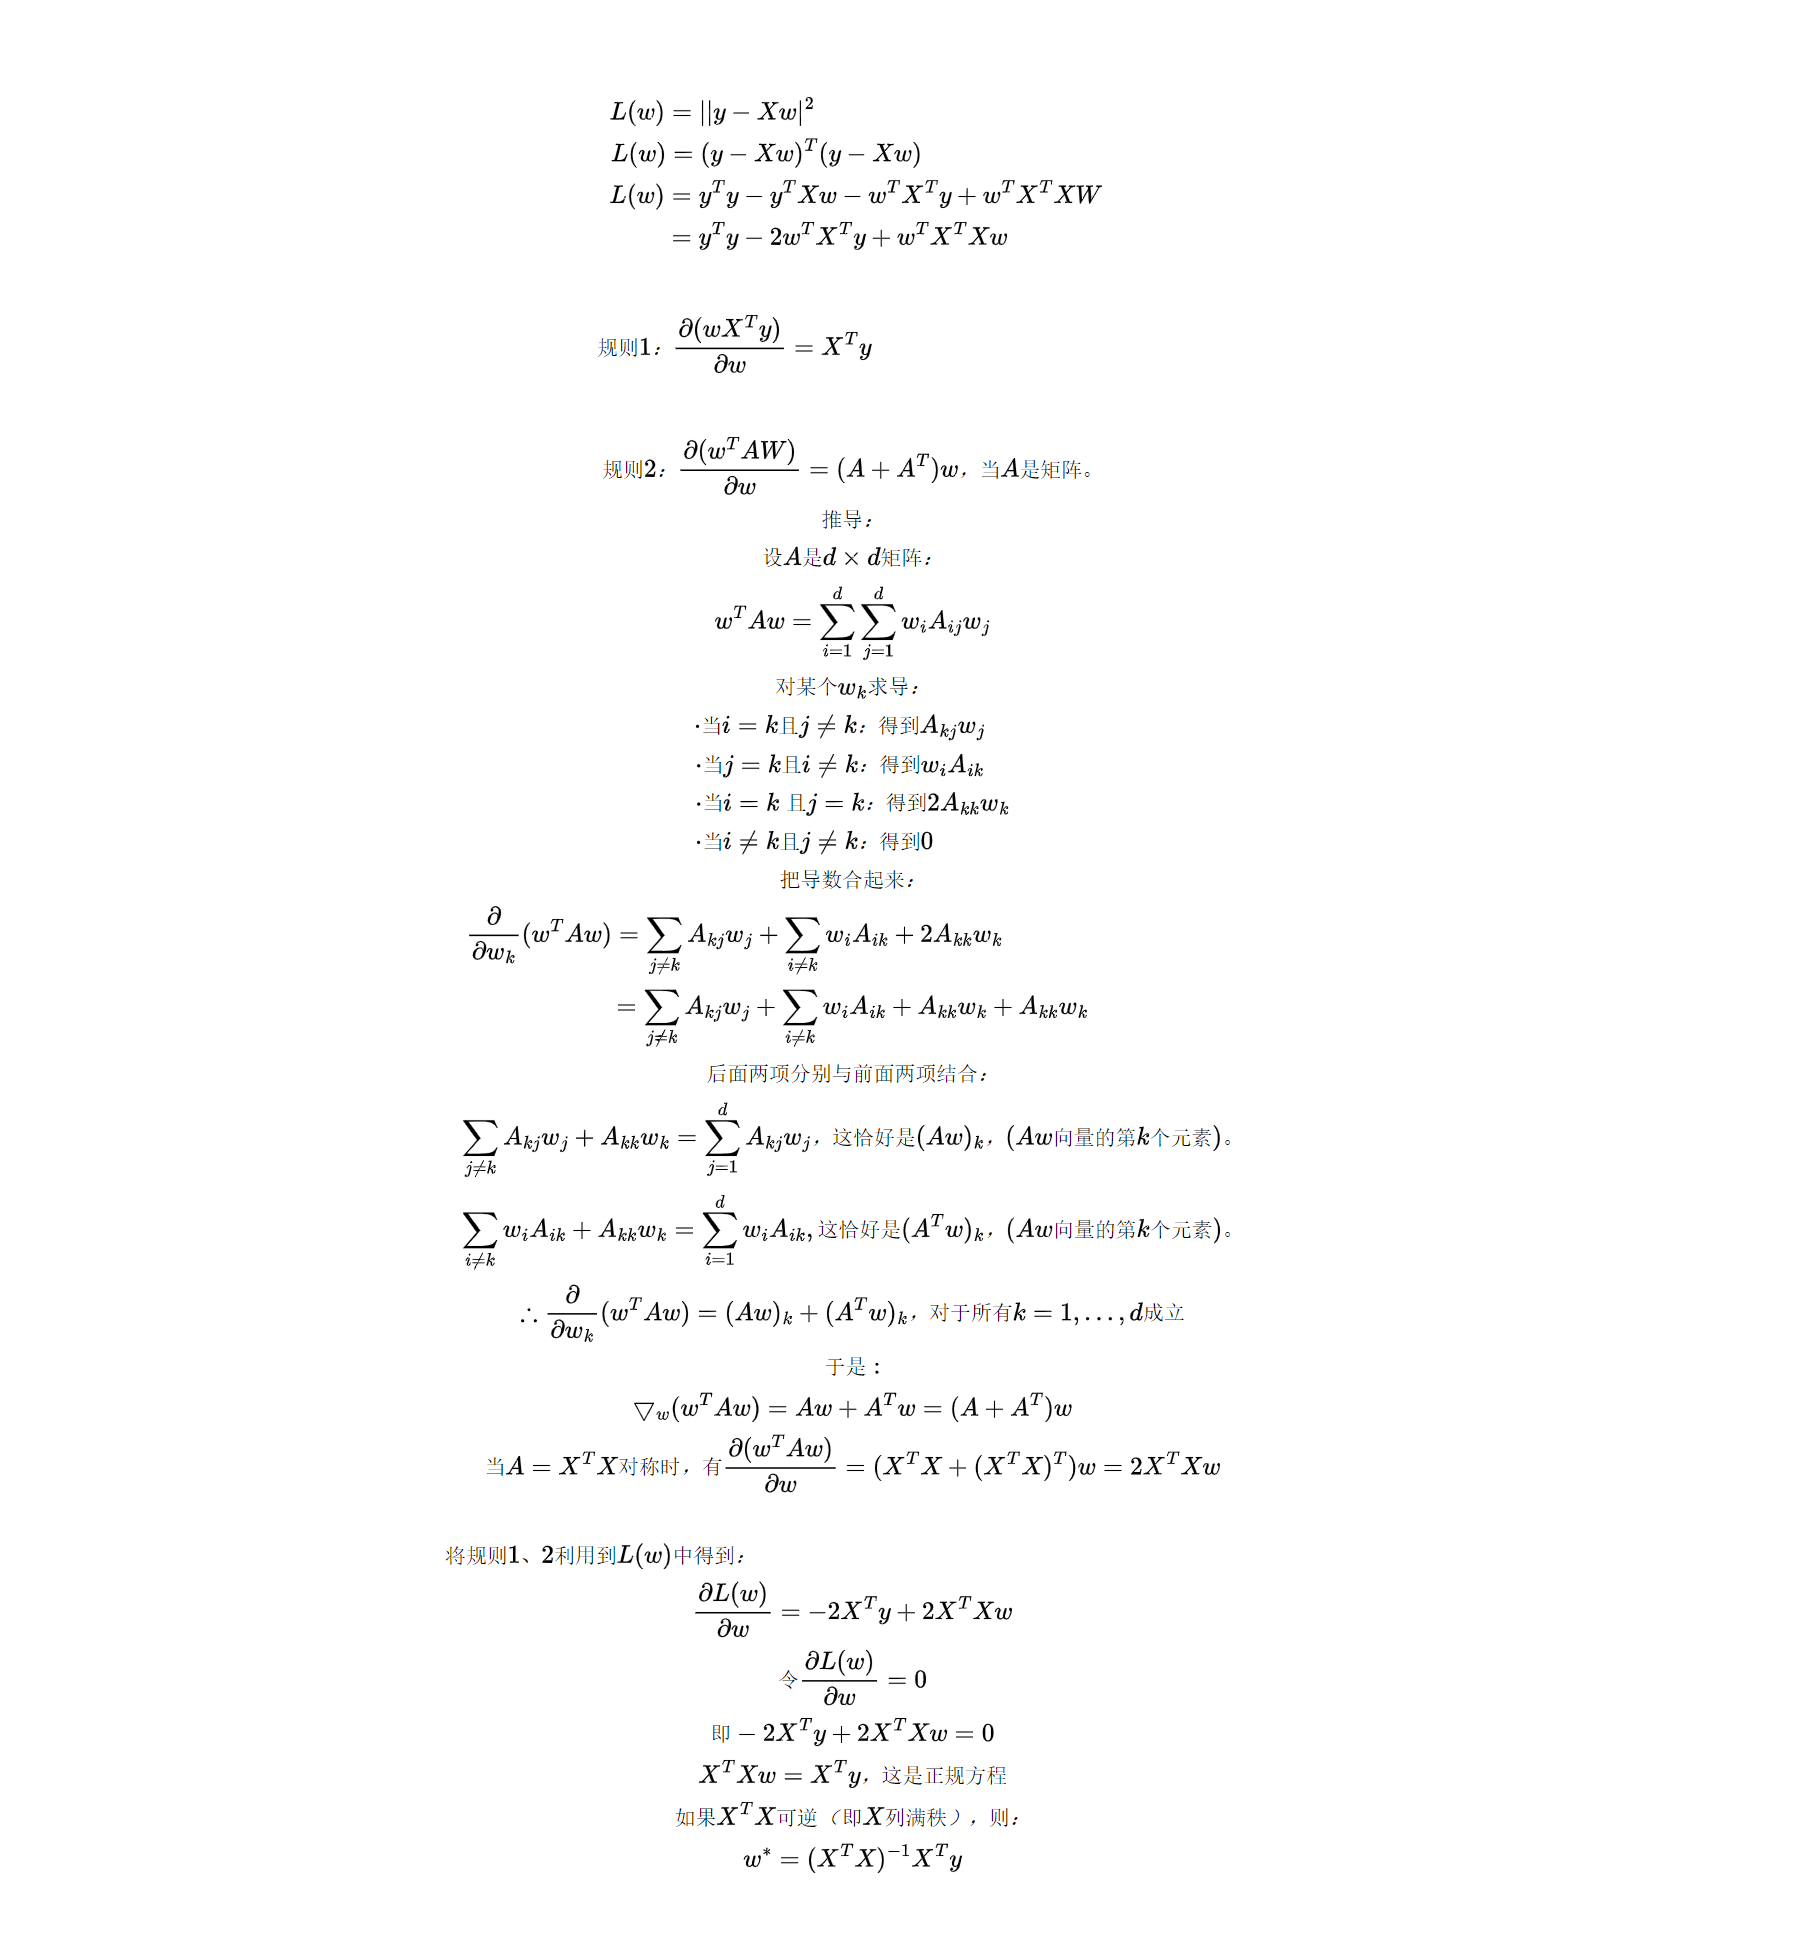

### 4随机梯度下降
即使在无法得到解析解的情况下，我们也可以有效地训练模型。在此我们用一种称为**梯度下降**地方法，这种方法几乎可以优化所有深度学习模型。它通过不断地在损失函数递减地方向上更新参数来降低误差。</br>
梯度下降地最简单的用法是计算损失函数关于模型参数的导数（可称之为梯度）。但实际中的执行可能会非常慢，因为在每次更新参数之前，我们必须遍历整个数据集。因此，我们通常会在每次需要计算更新的时候**随机抽取一小批样本**，这种变体叫做**小批量随机梯度下降**。</br>
在每次迭代中，我们先随机抽取一个小批量B，它是由固定数量的训练样本组成的；然后，计算小批量的损失均值关于模型参数的导数；最后，将梯度乘以一个预先确定的正数$\eta$ **（学习率）** ，并从当前参数的值减掉。抽象为下述公式：</br>
$$
(w,b) \longleftarrow  (w, b) -- \frac{\eta}{|B|}\sum_{i \in B}\partial_{(w, b)}l^i(w,b), \partial表示偏导数
$$

像学习率，批量大小可以预先手动指定，而不是通过模型训练得到的参数称为**超参数**。**调参是选择超参数的过程，超参数通常是我们根据训练迭代结果来调整的，而训练迭代结果是在独立的验证集上评估得到的。** </br>
线性回归恰好是一个在整个域中只有一个最小值的学习问题。但是一般情况下损失平面上通常包含多个最小值。事实上，我们很难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较小的损失，这一挑战称为**泛化**。

## 1.2 向量化加速
在训练我们模型的时候，我们经常希望能够同时处理整个小批量样本。为了实现这一点，**需要我们对计算进行向量化，从而利用线性代数库，而不是在Python中编写巨大的for循环。**

In [1]:
%matplotlib inline #  Matplotlib库将绘制的图形直接嵌入在 Notebook 的输出单元格中，而不是弹出一个单独的窗口显示图表。
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

下面我们将上述两种方式进行比较：

In [2]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [3]:
class Timer: #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并肩事件记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [6]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i] 
f'{timer.stop():.5f} sec'

'0.05663 sec'

In [10]:
timer.start()
d = a + b
f'{timer.stop():.10f} sec', type(a)

('0.0000000000 sec', torch.Tensor)

## 1.3正态分布与平方损失
**正态分布**也称为**高斯分布**。简答来说，若随机变量x具有均值$\mu$和方差$\sigma^2$(标准差$\sigma$)，其正态分布概率密度函数如下：
$$
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x - \mu)^2)
$$

In [11]:
# 计算正态分布函数
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp(-0.5 / sigma ** 2 * (x - mu) ** 2)

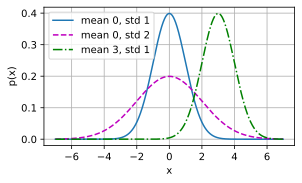

In [13]:
# 可视化正态分布
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]

d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel = 'x',
         ylabel = 'p(x)', figsize = (4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

正如上图所示，**改变均值会产生沿x轴的偏移，增加方差将会分散分布、降低其峰值。** </br>
这里有个重要的结论，**在高斯噪声的假设下，最小均方误差等价于对线性模型的极大似然估计。**